# Preparing Dataset

In [ ]:
from google.colab import files
!pip install -q kaggle

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir ~/.kaggle # <-------- uncomment this for the first time
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

 97% 298M/306M [00:03<00:00, 97.6MB/s]
100% 306M/306M [00:03<00:00, 92.1MB/s]


In [ ]:
!unzip /content/rockpaperscissors.zip

Archive:  /content/rockpaperscissors.zip
  inflating: README_rpc-cv-images.txt  
  inflating: paper/04l5I8TqdzF9WDMJ.png  
  inflating: paper/0Og76sl5CJhbxWWx.png  
  inflating: paper/0RA9rcrv8iVvuDDU.png  
  inflating: paper/0Uomd0HvOB33m47I.png  
  inflating: paper/0a3UtNzl5Ll3sq8K.png  
  inflating: paper/0cb6cVL8pkfi4wF6.png  
  inflating: paper/0eqArS2GgsBeqgSn.png  
  inflating: paper/0t08v9bAaA0mXGCQ.png  
  inflating: paper/0vugygEjxQJPr9yz.png  
  inflating: paper/0zKU6wEhT2cDe9j0.png  
  inflating: paper/14K62H4KG1hg5qiJ.png  
  inflating: paper/1Dfw5FRlS4h60JPX.png  
  inflating: paper/1Frbe8cdOdkciOBg.png  
  inflating: paper/1Tt9U9SzrOm98Xtw.png  
  inflating: paper/1fKclJk4eBWOQSR1.png  
  inflating: paper/1jHtb93pI8f6pfKo.png  
  inflating: paper/1oKnUgV2CdCaQUUX.png  
  inflating: paper/1uoW7QcH2qAgCTxv.png  
  inflating: paper/1yKjzquSvl9ShK7K.png  
  inflating: paper/1yeoLbmp4alVOtFv.png  
  inflating: paper/27XFtQjjXQ8AP8Tl.png  
  inflating: paper/2DQbLQfHlfrcATqi.p

# Data generation

In [ ]:
import tensorflow
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_dir = '/content/rps-cv-images'

In [ ]:
batch_size = 16
IM_WIDTH = 120
IM_HIGHT = 120
num_classes=3

datagen = ImageDataGenerator(
    rescale = 1/255.0,
    zoom_range = 0.25,
    rotation_range=10,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.4    
)

training_generator = datagen.flow_from_directory(
    base_dir,
    target_size = (IM_WIDTH,IM_HIGHT),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='rgb',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
        base_dir,
        target_size=(IM_WIDTH,IM_HIGHT),
        batch_size=batch_size,
        class_mode='categorical',
        color_mode='rgb',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Model

In [ ]:
from tensorflow.keras.layers import Input , Conv2D , Dense , Flatten , MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.optimizers import SGD

In [ ]:
def load_model(input_shape , debug=False):
	input = Input(input_shape)
	x = Conv2D(filters = 5 , kernel_size = (2,2) , padding="valid", activation = 'relu')(input)
	x = MaxPooling2D((2,2))(x)
	x = Conv2D(filters = 8 , kernel_size = (4,4) , padding="valid", activation = 'relu')(x)
	x = MaxPooling2D((2,2))(x)
	x = Conv2D(filters = 8 , kernel_size = (2,2) , padding="valid", activation = 'relu')(x)
	x = Conv2D(filters = 10 , kernel_size = (2,2) , padding="valid", activation = 'relu')(x)
	x = Flatten()(x)
	x = Dense(500 , activation = 'relu')(x)
	x = Dense(100 , activation = 'relu')(x)
	x = Dense(50 , activation = 'relu')(x)
	x = Dense(3 , activation = 'softmax')(x)

	model = Model(inputs = input , outputs = x)
	if debug: model.summary()
	return model

In [ ]:
model = load_model((IM_WIDTH,IM_HIGHT,3) , debug=True)

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 120, 120, 3)]     0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 119, 119, 5)       65        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 59, 59, 5)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 56, 56, 8)         648       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 27, 27, 8)         264       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 10)       

In [ ]:
opt = SGD(learning_rate=0.01)
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics = ['accuracy'])

# Training

In [ ]:
model.fit(
    training_generator,
    epochs = 25,
    batch_size = 16,
    validation_data = validation_generator,
)

Epoch 1/25
83/83 [==============================] - 25s 302ms/step - loss: 0.9892 - accuracy: 0.5061 - val_loss: 0.7359 - val_accuracy: 0.6808
Epoch 2/25
83/83 [==============================] - 25s 299ms/step - loss: 0.6083 - accuracy: 0.7451 - val_loss: 0.5750 - val_accuracy: 0.7517
Epoch 3/25
83/83 [==============================] - 25s 302ms/step - loss: 0.4013 - accuracy: 0.8493 - val_loss: 0.3405 - val_accuracy: 0.8787
Epoch 4/25
83/83 [==============================] - 25s 299ms/step - loss: 0.3014 - accuracy: 0.8805 - val_loss: 0.2724 - val_accuracy: 0.9130
Epoch 5/25
83/83 [==============================] - 25s 298ms/step - loss: 0.2655 - accuracy: 0.8980 - val_loss: 0.2491 - val_accuracy: 0.9119
Epoch 6/25
83/83 [==============================] - 25s 298ms/step - loss: 0.2041 - accuracy: 0.9262 - val_loss: 0.1806 - val_accuracy: 0.9371
Epoch 7/25
83/83 [==============================] - 25s 301ms/step - loss: 0.1778 - accuracy: 0.9376 - val_loss: 0.2413 - val_accuracy: 0.9108

In [ ]:
model.save('/content/drive/My Drive/weights.h5')

# Testing

In [ ]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt

path = '/content/scissors'

names = os.listdir(path=path)
im = cv2.imread(path+'/'+names[10])
print(im.shape)
im = cv2.resize(im , (120,120) )
im2 = np.expand_dims(im, axis=0)


(200, 300, 3)


Class: scissors
Time :  0.14145684242248535


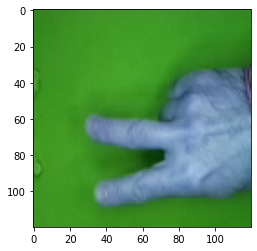

In [ ]:
start = time.time()
pred = model.predict(im2)
end = time.time()
plt.imshow(im)

if np.argmax(a=pred) == 0:
  print("Class: paper")
elif np.argmax(a=pred) == 1:
  print("Class: rock")
elif np.argmax(a=pred) == 2:
  print("Class: scissors")       

print("Time : ",end-start)